In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
#data_gen
mean1 = [10,10]
mean2 = [5,5]

cov1 = [[1,-0.3],[-0.3,1]]
cov2 = [[1,-0.3],[-0.3,1]]

x1 = np.random.multivariate_normal(mean1, cov1,size = 100)
x2 = np.random.multivariate_normal(mean2, cov1,size = 100)

x = np.vstack((x1,x2))
lable = np.append(np.ones(100),np.zeros(100))

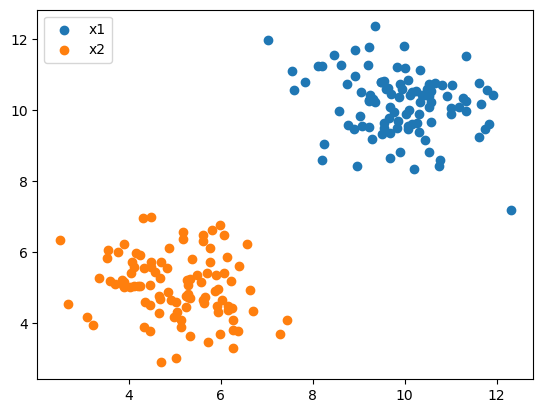

In [27]:
#plot data
plt.scatter(x1[:,0],x1[:,1],label = 'x1')
plt.scatter(x2[:,0],x2[:,1],label = 'x2')
plt.legend()
plt.show()

Generative models use Bayes rule to predict given y what x will be.
$P(y|x) = \frac{P(x|y)*P(y)}{P(x)}$
where $P(x) = P(x|y=1)P(y=1) + P(x|y=0)P(y=0)$
Here we generate two labels and each label has 100 samples, so $P(y=1) = P(y=0) = 0.5$
In addition, we assume $P(x|y)$ follows a normal distribution. This judgement is based on our prior knowledge.

In [28]:
#Find mean and variance of samples
miu1 = np.mean(x1,axis=0)
cov1 = np.cov(x1.T)

miu2 = np.mean(x2,axis=0)
cov2 = np.cov(x2.T)

In [29]:
def Py_given_x(miu,cov,x):
    return 1/(np.sqrt(2*np.pi) * np.linalg.det(cov)) * np.exp(-0.5 * np.matmul((x - miu),(x-miu).T) / np.linalg.det(cov))

In [30]:
def model(features,labels,test_point):
    test_point = np.array(test_point)
    features = np.array(features)
    labels = np.array(labels)


    #need to select from different labels
    x1 = features[:100]
    x2 = features[100:]

    Py1 = np.sum(labels)/len(labels)
    Py2 = 1-Py1

    miu1 = np.mean(x1,axis=0)
    cov1 = np.cov(x1.T)

    miu2 = np.mean(x2,axis=0)
    cov2 = np.cov(x2.T)

    P1 = Py_given_x(miu1,cov1,test_point)*Py1/(Py_given_x(miu1,cov1,test_point)*Py1 + Py_given_x(miu2,cov2,test_point)*Py2)
    P2 = Py_given_x(miu2,cov2,test_point)*Py2/(Py_given_x(miu1,cov1,test_point)*Py1 + Py_given_x(miu2,cov2,test_point)*Py2)

    print('The probability that the test point in label_1 is',P1)
    print('The probability that the test point in label_0 is',P2)

In [35]:
model(x,lable,[6,7])

The probability that the test point in label_1 is 1.902578162150582e-06
The probability that the test point in label_0 is 0.9999980974218379
